<div style="font-size:18pt; padding-top:20px; text-align:center">ЗАДАНИЕ 7. <b>Дерево решений и </b> <span style="font-weight:bold; color:green">NumPy/SciPy</span></div><hr>
<div style="text-align:right;">Папулин С.Ю. <span style="font-style: italic;font-weight: bold;">(papulin_hse@mail.ru)</span></div>

<a name="0"></a>
<div><span style="font-size:14pt; font-weight:bold">Содержание</span>
    <ol>
        <li><a href="#1">Варианты</a></li>
        <li><a href="#2">Задание</a></li>
    </ol>
</div>

<a name="1"></a>
<div style="display:table; width:100%; padding-top:10px; padding-bottom:10px; border-bottom:1px solid lightgrey">
    <div style="display:table-row">
        <div style="display:table-cell; width:80%; font-size:14pt; font-weight:bold">1. Варианты</div>
    	<div style="display:table-cell; width:20%; text-align:center; background-color:whitesmoke; border:1px solid lightgrey"><a href="#0">К содержанию</a></div>
    </div>
</div>

<p>Чтобы узнать свой вариант, введите Вашу фамилию в соответвующее поле ниже и запустите ячейку:</p>

In [85]:
surname = "Першин" #Ваша фамилия

alp = 'абвгдеёжзийклмнопрстуфхцчшщъыьэюя'
w = [1, 42, 21, 21, 34,  6, 44, 26, 18, 44, 38, 26, 14, 43,  4, 49, 45,
        7, 42, 29,  4,  9, 36, 34, 31, 29,  5, 30,  4, 19, 28, 25, 33]

d = dict(zip(alp, w))
variant =  sum([d[el] for el in surname.lower()]) % 15 + 1
print("Ваш вариант - ", variant)

import itertools
comb = list(itertools.combinations(range(1, 7), 2))
print("Задача №", comb[variant-1][0])
print("Задача №", comb[variant-1][1])

Ваш вариант -  1
Задача № 1
Задача № 2


<p><span style="color:red; font-weight:bold">ВНИМАНИЕ!</span> Варианты могут не совпадать с предыдущими ДЗ</p>

<a name="2"></a>
<div style="display:table; width:100%; padding-top:10px; padding-bottom:10px; border-bottom:1px solid lightgrey">
    <div style="display:table-row">
        <div style="display:table-cell; width:80%; font-size:14pt; font-weight:bold">2. Задание</div>
    	<div style="display:table-cell; width:20%; text-align:center; background-color:whitesmoke; border:1px solid lightgrey"><a href="#0">К содержанию</a></div>
    </div>
</div>

In [86]:
import pandas as pnd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from sklearn import cross_validation
from sklearn import datasets
from sklearn import svm
from sklearn.linear_model import LinearRegression
%matplotlib inline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from numpy.polynomial.polynomial import polyval
from sklearn.metrics import mean_squared_error
from sklearn import tree

<ol>
    <li>Загрузить исходные данные</li>
    <li>Отобразить исходные данные</li>
    <li>Разделить исходные данные на обучающее (train_init) и тестовое подмножества (test) - см. ДЗ 5-6</li>
    <li>Разделить обучающее подмножество (train_init) на 4 folds - см. ДЗ 5-6</li>
    <li>Выбрать модель: построить график MSE/Accuracy-Max_depth, выбрать наилучшую модель</li>
    <li>Повторить обучение лучшей модели на train_init</li>
    <li>Проверить на тестовом подмножестве</li>
    <li>Построить итоговые графики регрессии/классификации для train_init и test</li>
</ol>

<p><span style="color:green; font-weight:bold">ПРИМЕЧАНИЕ!</span> Везде random_state=0</p>

<p><b>Задача 1.</b> Регрессия и Decision Tree - набор <b><i>"Reg_A5.csv"</i></b></p>

In [87]:
df = pnd.read_csv("Reg_A5.csv")
x = df.X.values
y = df.Y.values
df[1:6]

,X,Y
1,0.103760,10.409240
2,3.168241,7.643742
3,3.744019,8.453341
4,2.492535,9.317824
5,1.123983,9.882790


In [88]:
x_train_init, x_test, y_train_init, y_test = cross_validation.train_test_split(x, y, test_size=0.3, random_state=0)
kf = cross_validation.KFold(n = len(x_train_init), n_folds = 4, shuffle = True, random_state = 0)

In [89]:
for TI, VI in kf:
    print(x_train_init[TI])
    print(x_train_init[VI])

[ 4.49012154  1.7582632   4.65457918  1.69339566  4.26966875  4.22192897
  4.58887061  1.68877323  3.07350856  4.24254591  2.14746089  1.28651444
  1.55141853  0.45053367  2.18059128  1.31107831  1.14391167  2.98685824
  2.71732519  1.49864936  0.71085024  3.00519477  0.74266726  3.60877659
  0.21548678  2.81595342  0.10582596  0.18778838  2.49253506  4.88540363
  1.925568    4.5141588   1.52729959  2.29362115  0.04610551  2.73793078
  4.29324508  2.56096132  0.18547207  3.74401941  2.94673856  2.20916587
  4.02611598  3.81620294  3.91982143  1.06593283  3.57287892  4.10608238
  0.23369614  3.02788782  3.16824117  0.61254991  3.90974559  2.56561354
  3.42679909  0.46720188  4.06310481  4.00034375  1.96264622  1.52286678
  3.7230162   4.06658042  2.08449204  0.12216322  3.22163308  1.31701582
  4.28425151  0.07430012  0.92313419  0.52309872  3.36733463  1.59136403
  0.24597579  4.89409573  0.12631973  0.56992181  2.29257103  3.85660322
  1.69853922  1.86014451  3.00477104  0.61167961  1

ValueError: could not broadcast input array from shape (157,1) into shape (157)

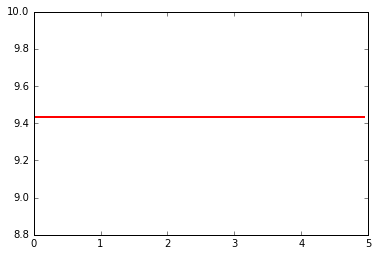

In [104]:
mse1=[0 for x in range(4)]
mse2=[0 for x in range(4)]
pf = [PolynomialFeatures(degree = i) for i in range(4)]


for TI, VI in kf:
    x_train = x_train_init[TI]
    x_val = x_train_init[VI]
    y_train = y_train_init[TI] 
    y_val =  y_train_init[VI]
    x_train = [p.fit_transform(x_train.reshape(-1, 1)) for p in pf]
    x_val = [p.fit_transform(x_val.reshape(-1, 1)) for p in pf]
    Reg = [tree.DecisionTreeRegressor(criterion="mse", max_depth=100, random_state=0).fit(q, y_train) for q in x_train]
    y_pr_train = [Reg[i].predict(x_train[i]) for i in range(4)]
    y_pr_val = [Reg[i].predict(x_val[i]) for i in range(4)]
    
    mse_train = np.array([((t - y_train)**2).sum() for t in y_pr_train]) / len(y_train)
    mse_val = np.array([((t - y_val)**2).sum() for t in y_pr_val]) / len(y_val)
    mse1 = mse1 + 0.25 * mse_train
    mse2 = mse2 + 0.25 * mse_val
    
    xx = np.arange(x.min(), x.max(), 0.01)[:, np.newaxis]
    plt.plot(xx, Reg[i].predict(xx), c="r", label="max_depth=5", linewidth=2)
    plt.plot(x_val, y_val, "o")
    plt.vlines(x_train, ymin=y_train, ymax=Reg[i].predict(x_train), colors="black", linestyles="dotted")
    plt.plot(x_val, Reg[i].predict(x_val), "o", color="red", lw=2)
    plt.grid()
    plt.show()
    
table = pnd.DataFrame([mse1, mse2]).T
table.columns = ['train data MSE', 'val data MSE']
table.index = list(range(4))
table

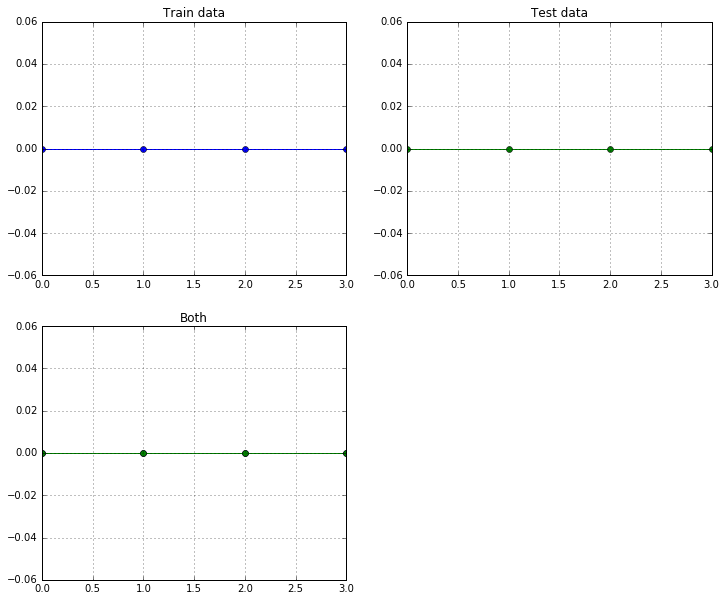

In [97]:
plt.figure(1, figsize=[12, 10])

plt.subplot(2,2,1)
plt.title("Train data")
plt.plot(mse1_y, "-o")
plt.grid(True)

plt.subplot(2,2,2)
plt.title("Test data")
plt.plot(mse2_y, "-o", color = "green")
plt.grid(True)

plt.subplot(2,2,3)
plt.title("Both")
plt.plot(mse1_y, "-o")
plt.plot(mse2_y, "-o", color = "green")
plt.grid(True)
plt.show()

In [ ]:
DecisionTreeRegressor(criterion="mse", max_depth=i, random_state=0)

<p><b>Задача 2.</b> Регрессия и Random Forest - набор <b><i>"Reg_A5.csv"</i></b></p>

In [ ]:
RandomForestRegressor(n_estimators=50, max_depth=i, criterion="mse", bootstrap=True,
                                    oob_score=False, random_state=0)